![alt text](http://www.civictechs.com/wp-content/uploads/2019/06/instruct8.jpg)

# How to Analyze Geographic Data in Shapefiles

---

From empty Dorrito bags and fast food cups lining the curb, to plastic bags stuck in trees, litter mars too many L.A. neighborhoods. In response, in 2016 Mayor Eric Garcetti implemented a scoring system to [quantify cleanliness](https://www.citylab.com/solutions/2016/05/how-los-angeles-is-using-data-to-tackle-street-cleanliness/481722/) of city streets. How does your neighborhood stack up? Are you forced to hop over abandoned mattresses, or strolling down a sparkling sidewalk? To answer this question, we will look at cleanliness ratings for various neighborhoods in Los Angeles County. 

While programming experience helps for this instructable, it is not required.* (Please see our [first](https://colab.research.google.com/drive/1102rYgCZMWIPa0HdezbiiEx-t5Ikct0s#scrollTo=bu7i1hbHvGzW) and [second](https://colab.research.google.com/drive/1QKoElHpzqC0wf7T4oBFbZ4QQXgXRSXMr#scrollTo=w4D-Jd8tgvBQ) instructables for information on the tools used in this exercise, and the [final](https://colab.research.google.com/drive/1NyiS1KsojrsGxBSf5zxeil-M4R_ffD-2#scrollTo=l6t7XEUgDGZY) instructable for information on APIs)*

# Step 1: Gather and Understand Ingredients Used in This Notebook

In this instructable we'll be exploring another way to map geographic data: using the [shapefile format](http://desktop.arcgis.com/en/arcmap/10.3/manage-data/shapefiles/what-is-a-shapefile.htm) created by ESRI. Shapefiles are vector format files about geographic coordinates or polygons that are stored in a compressed zip file. Vector formats store information about graphics as mathematical formulas, rather than pixels, which makes the files small and portable. About 2127 entries on [LA Counts](http://lacounts.org/) feature shapefiles, making it one of the more popular formats. When you use shapefiles, Mapbox converts the data from the compressed zip file to vector tiles. From there, you can create styles using this geographic data to generate map visualizations, similar to the last Instructable, which mapped geographic coordinates. 

For this exercise, you will need: 

*  Download a Shapefile dataset from [LA Counts ](https://lacounts.org). In this exercise we will use a dataset for the [Clean Streets Index](https://www.lacounts.org/dataset/clean-streets-index-grids-2018-quarter-3) created by the city of Los Angeles. We selected this file becuase it was well-documented through metadata, and featured a Shapefile. 
*  A Jupyter Notebook like this one, hosted on [Google's colab.](http://colab.research.google.com/) 
*   Free Python Libraries (pyshp [link text](https://pypi.org/project/pyshp/
), [numpy](http://www.numpy.org/), [pandas](https://pandas.pydata.org/), and [plotly](https://plot.ly/python/)), and [Mapbox](https://www.mapbox.com/). These are accessible within Jupyter Notebooks, so you don't need to download them. 
*   Your smarts! 🧠 

# Step 2: Upload Shapefile Data to Jupyter Notebook 

First, unzip your shapefile package that you downloaded from LA Counts. Next, upload all the files in the zip file to the Jupyter Notebook. Do this by: 

1. If necessary, click on the arrow in your upper-left corner to open the sidebar. 

![alt text](http://www.civictechs.com/wp-content/uploads/2019/06/step-1-arrow.png)

2. Click on "Files," then "upload." 

![alt text](http://www.civictechs.com/wp-content/uploads/2019/06/steps-2-and-three.png)

3. Select and upload your files. You should then see them appear in the file window. 


# Step 3: Load and Print The Shapefile  

Next, load your shapefile and print it out. 

The Los Angeles Clean Streets Index is a grading system for every street in Los Angeles. The Bureau of Sanitation drove and scored over 9,000 miles of streets and alleys - each segment received a "cleanliness score" from 1-3. Each street score is based on four factors: litter (Seg_LL_Sco), weeds (Seg_Wd_Sco), bulky items (Seg_Bk_Sco), and illegal dumping (Seg_ID_Sco) that are aggregated into CSCatScore, a value that designates overall cleanliness. This assessment is repeated every quarter. This assessment is for Quarter 2 of 2018. Los Angeles is leading the way as the only big city in the US conducting a regular cleanliness assessment of every City street. 

In [0]:
print("Installing geopandas...")

# We need to install geopandas and descartes using PIP because they are 
# not installed on Jupyter by default. 

!pip install geopandas
!pip install descartes 

import geopandas as gpd

# Next, print out the shapefile. 
# It won't look like much because we are looking at geographic coordinates. 

print("Loading Shapefile...")

# If using your files, replace below filename ("Clean_Streets_Index_Grids_2018_Quarter_3.shp") with the 
# shapefile filename you uploaded. 

shapefile = gpd.read_file("Clean_Streets_Index_Grids_2018_Quarter_3.shp")

# The "head" function prints out the first five rows in full, so you can see
# the columns in the data set too! 

shapefile.head()

Installing geopandas...
Loading Shapefile...


,OBJECTID_1,GridID,Seg_Bk_Sco,Seg_ID_Sco,Seg_LL_Sco,Seg_Wd_Sco,CSCatScore,Ones,Twos,Threes,Shape__Are,Shape__Len,geometry
0,1001,1737,0,0,0,0,1,73.0,None,None,2.301369e+06,6113.990918,"POLYGON ((-118.502164915554 34.2779654507938, ..."
1,1002,1738,1,0,0,0,1,43.0,None,None,1.164189e+06,4571.230160,"POLYGON ((-118.486816533273 34.2719442754645, ..."
2,1003,1739,0,0,0,0,1,18.0,None,None,4.985880e+05,4502.316180,"POLYGON ((-118.487115763891 34.2696617823013, ..."
3,1004,1743,0,0,0,0,1,34.0,None,None,1.193565e+06,4679.669861,"POLYGON ((-118.540306416829 34.2645445618968, ..."
4,1005,1745,0,0,0,0,1,61.0,None,None,2.933554e+06,7877.212031,"POLYGON ((-118.521580732897 34.2649084458689, ..."


# Step 4: Display the Shapefile Data as a Map

Finally, display your shapefile data as a map. The polygons above will be rendered as they appear on the map of Los Angeles County. Yellow polygons designate neighborhoods that receive high (bad) scores on the four criteria: 


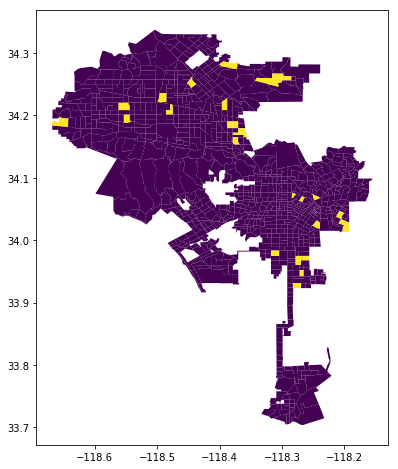

In [0]:
shapefile.plot(column='CSCatScore', figsize=(16,8))

# Step 5: Analyze

* Why are these regions scoring low on cleanliness? 
* Are they densely populated areas, or are calls for bulky item pickups going unresponded to? 
* You could use the sub-variables - litter (Seg_LL_Sco), weeds (Seg_Wd_Sco), bulky items (Seg_Bk_Sco), and illegal dumping (Seg_ID_Sco) - to calculate your own aggregate score to map. 

# Step 6: What next?

Congratulations, you just learned how to load and display shapefiles! In fact, you created a graphic with a fancy name, a Choropleth – a map where the color of each shape is based on the value of an associated variable! Here are some things you might do next: 

* Are you interested to make this map more interactive, or [adding a legend](http://geopandas.org/mapping.html#creating-a-legend) to your map? 

Have fun with your data analysis, and come back for the [next instructable](https://colab.research.google.com/drive/1Fuo0mHo9U_FMGp8BArGJKTxu75f1joWv#scrollTo=WlbDYtGBkFFi)! 